### Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

### Importing Data

In [2]:
data = pd.read_csv("after_clean.csv").drop(columns=['Unnamed: 0'])
data.head()

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
0,1975,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


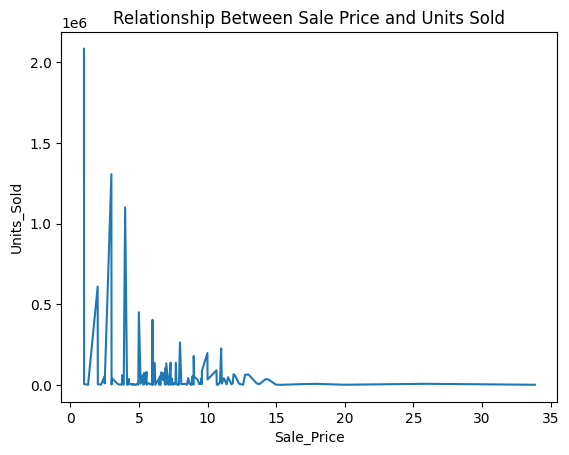

In [3]:
temp = data.groupby('Sale_Price')['Units_Sold'].sum().to_frame().reset_index()

# linechart for Sale Price and Units Sold
plt.plot(temp['Sale_Price'], temp['Units_Sold'])
plt.title('Relationship Between Sale Price and Units Sold')
plt.xlabel('Sale_Price')
plt.ylabel('Units_Sold')
# Show the Chart Plot
plt.show()

The graph shows an inverse relationship between sale price and units sold, where the number of units sold decreases significantly as the sale price increases.

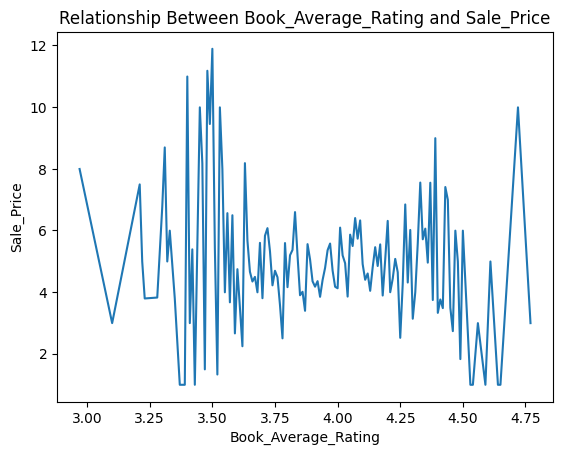

In [4]:
temp = data.groupby('Book_Average_Rating')['Sale_Price'].mean().to_frame().reset_index()

# linechart for Sale Price and Units Sold
plt.plot(temp['Book_Average_Rating'], temp['Sale_Price'])
plt.title('Relationship Between Book_Average_Rating and Sale_Price')
plt.xlabel('Book_Average_Rating')
plt.ylabel('Sale_Price')
# Show the Chart Plot
plt.show()

The graph illustrates a seemingly weak correlation between the average rating of books and their sale price. While there are a few instances of high-rated books achieving higher prices, the overall trend does not exhibit a consistent positive relationship. This suggests that other factors, such as publishing house, genre, and marketing, may play a more dominant role in determining a book's sale price.

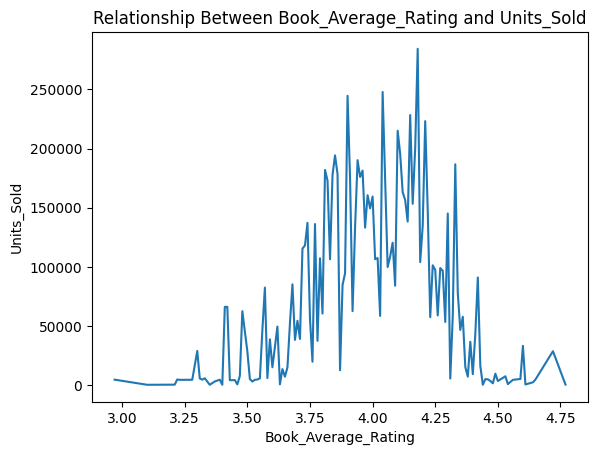

In [5]:
temp = data.groupby('Book_Average_Rating')['Units_Sold'].sum().to_frame().reset_index()

# linechart for Sale Price and Units Sold
plt.plot(temp['Book_Average_Rating'], temp['Units_Sold'])
plt.title('Relationship Between Book_Average_Rating and Units_Sold')
plt.xlabel('Book_Average_Rating')
plt.ylabel('Units_Sold')
# Show the Chart Plot
plt.show()

The graph illustrates a seemingly weak correlation between the average rating of books and their units sold. While there are a few instances of high-rated books achieving significant sales, the overall trend does not exhibit a consistent positive relationship. This suggests that other factors, such as marketing, author popularity, and genre, may play a more dominant role in determining a book's commercial success.

### Visualization and Analysis for Genre

Text(0.5, 1.0, 'Distribution of Books Types')

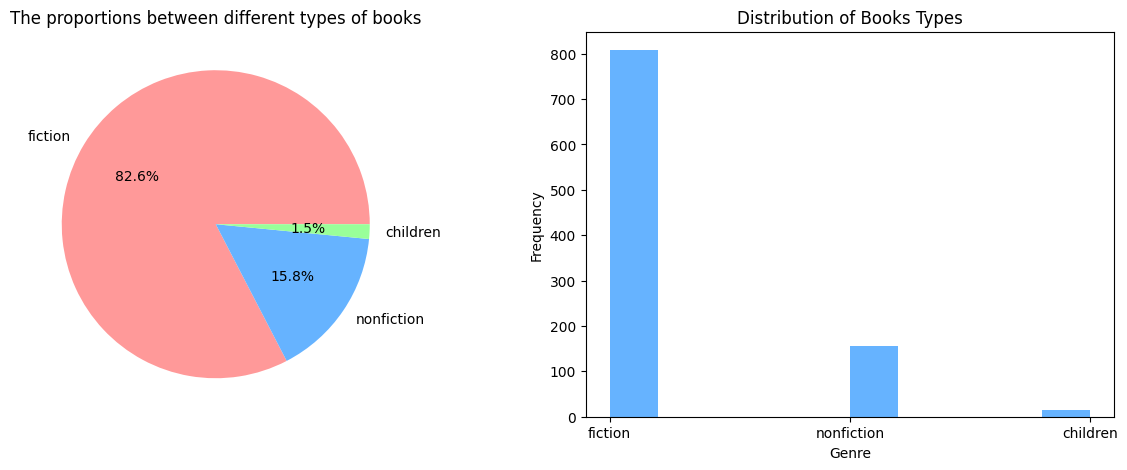

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Pie Chart
axs[0].pie(data['Genre'].value_counts(), labels= data['Genre'].value_counts().index, 
        autopct="%1.1f%%", colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('The proportions between different types of books')

# Bar Plot
axs[1].hist(data['Genre'], color='#66b3ff')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Books Types')

The visualizations indicate that the majority of books belong to the **fiction** category, accounting for **82.6%** of the total. This is followed by **nonfiction** at **15.8%**, while **children's books** make up only **1.5%**. This suggests that publishers prioritize fiction over other book types.

Text(0, 0.5, 'Gross Sales')

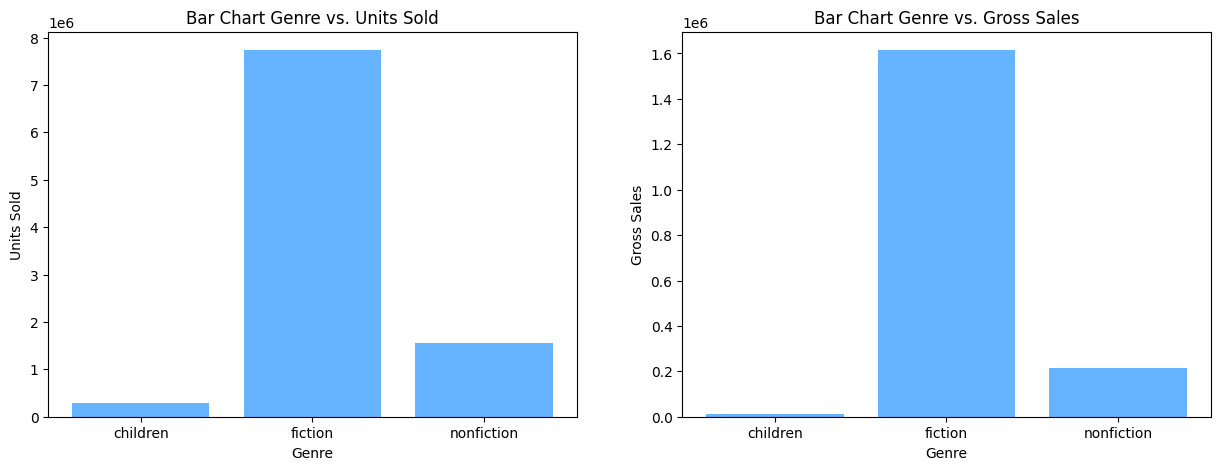

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Bar chart for Genre vs. Units Sold
temp = data.groupby('Genre')['Units_Sold'].sum().to_frame().reset_index()

axs[0].bar(temp['Genre'], temp['Units_Sold'], color='#66b3ff')
axs[0].set_title('Bar Chart Genre vs. Units Sold')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Units Sold')

# Bar chart for Genre vs. Gross Sales
temp = data.groupby('Genre')['Gross_Sales'].sum().to_frame().reset_index()

axs[1].bar(temp['Genre'], temp['Gross_Sales'], color='#66b3ff')
axs[1].set_title('Bar Chart Genre vs. Gross Sales')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Gross Sales')

The bar charts show that "genre fiction" dominates in units sold and gross sales "profit" significantly surpassing other genres. "Nonfiction" ranks second, while "fiction" and "children" genres have the lowest performance.

In [8]:
temp = data.groupby('Genre', as_index=False).agg({
    'Gross_Sales': 'sum',
    'Sale_Price': 'mean'
})

fig = px.treemap(temp,
                 path=['Genre'], 
                 values='Gross_Sales',
                 color='Sale_Price',
                 color_continuous_scale='RdBu',
                 title='Treemap of Gross Sales by Genre with Average Sale Price')

fig.show()

From the previous chart, we conclude that the genre of books with the highest sales percentage is "Genre Fiction," which also has the lowest average price per book.

### Visualization and Analysis for Publishers

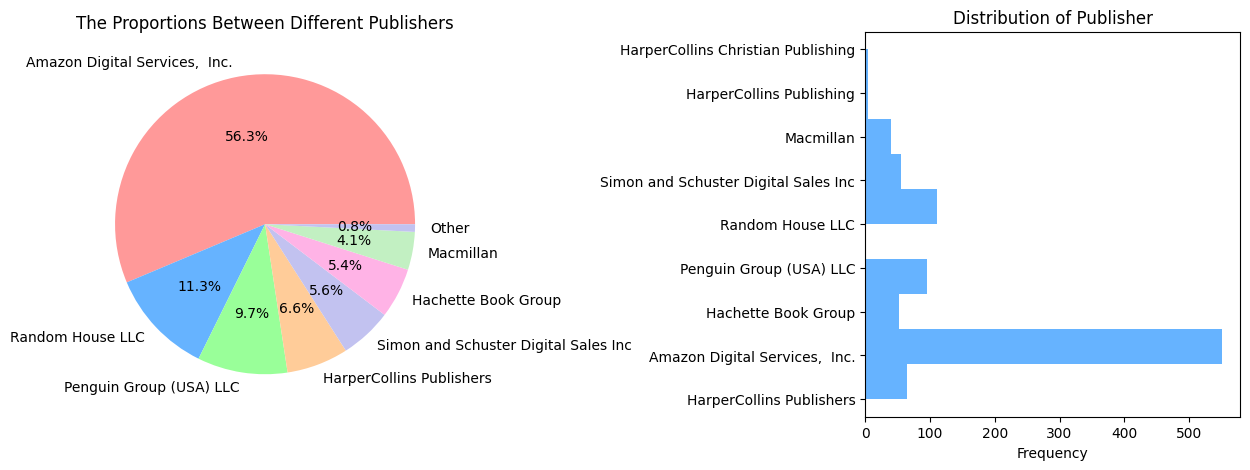

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Pie Chart
publishers = data['Publisher'].value_counts()

other_publishers = publishers[7:].sum()
publishers = publishers[:7]
publishers['Other'] = other_publishers

axs[0].pie(publishers, labels= publishers.index, 
        autopct="%1.1f%%", colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#c2c2f0'])

axs[0].set_title('The Proportions Between Different Publishers')

# Bar Plot
axs[1].hist(data['Publisher'], color='#66b3ff', orientation='horizontal')
axs[1].set_xlabel('Frequency')
# axs[1].set_ylabel('Publisher')
axs[1].set_title('Distribution of Publisher')

plt.subplots_adjust(wspace=1.1)
plt.show()


The visualizations show that Amazon Digital Services, Inc. dominates the publishing market with a 56.3% share, followed by Random House LLC (11.3%) and Penguin Group (USA) LLC (9.7%). Other publishers, including Hachette Book Group, HarperCollins, and Macmillan, have smaller shares. The bar chart reinforces this distribution, highlighting Amazon's overwhelming presence compared to others.

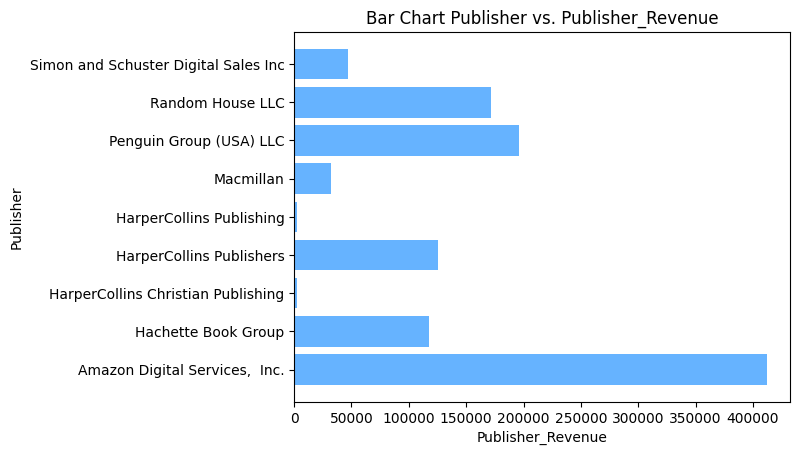

In [10]:
temp = data.groupby('Publisher')['Publisher_Revenue'].sum().to_frame().reset_index()

plt.barh(temp['Publisher'], temp['Publisher_Revenue'], color='#66b3ff')
plt.title('Bar Chart Publisher vs. Publisher_Revenue')
plt.xlabel('Publisher_Revenue')
plt.ylabel('Publisher')

plt.show()

The bar chart shows that Amazon Digital Services, Inc. generates the highest revenue among publishers, followed by Penguin Group (USA) LLC and Random House LLC. Hachette Book Group also performs strongly, while publishers like Macmillan and HarperCollins Publishers contribute moderate revenue. Smaller publishers, such as HarperCollins Christian Publishing and HarperCollins Publishing, generate minimal revenue in comparison.

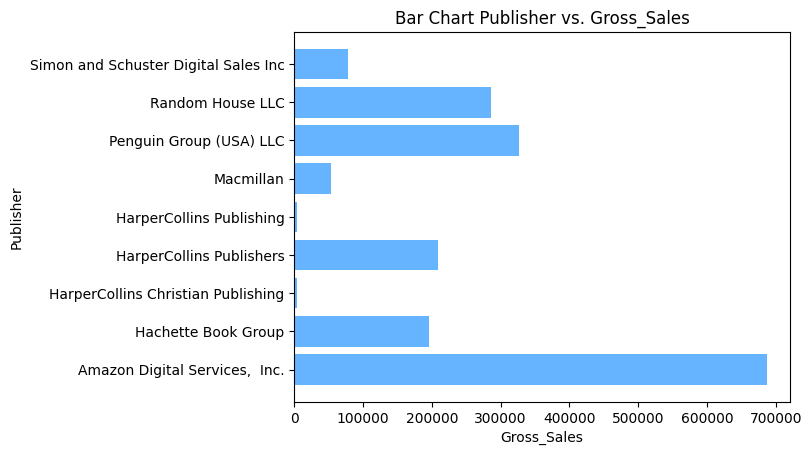

In [11]:
temp = data.groupby('Publisher')['Gross_Sales'].sum().to_frame().reset_index()

plt.barh(temp['Publisher'], temp['Gross_Sales'], color='#66b3ff')
plt.title('Bar Chart Publisher vs. Gross_Sales')
plt.xlabel('Gross_Sales')
plt.ylabel('Publisher')

plt.show()

The bar chart illustrates that Amazon Digital Services, Inc. leads gross sales significantly, far surpassing all other publishers. Penguin Group (USA) LLC and Random House LLC rank second and third, respectively, with moderate sales. Other publishers, such as Hachette Book Group and HarperCollins Publishers, generate comparatively lower sales, while smaller publishers contribute minimally to overall gross sales.

In [12]:
temp = data.groupby('Publisher', as_index=False).agg({
    'Units_Sold': 'sum',
    'Publisher_Revenue': 'sum'
})

fig = px.treemap(temp,
                 path=['Publisher'], 
                 values='Units_Sold',
                 color='Publisher_Revenue',
                 color_continuous_scale='RdBu',
                 title='Treemap of Units Sold by Publisher with Revenue Highlight')

fig.show()

From the previous chart, we deduce that the highest number of book sales is dominated by Amazon Digital Services, while the highest profit margin belongs to Penguin Group.

### Visualization and Analysis for Publishing_Years

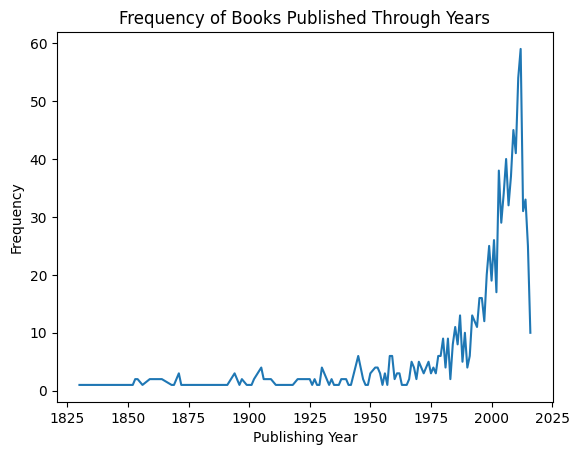

In [13]:
temp = data['Publishing_Year'].value_counts().sort_index()

plt.plot(temp.index, temp.values)
plt.title('Frequency of Books Published Through Years')
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.show()

The chart shows the count of books published by year. It highlights a gradual increase in publication frequency until around the mid-20th century, followed by a sharp rise after 1975, peaking in the early 2000s. A slight decline is observed after the peak. This suggests a significant growth in book publishing during recent decades.

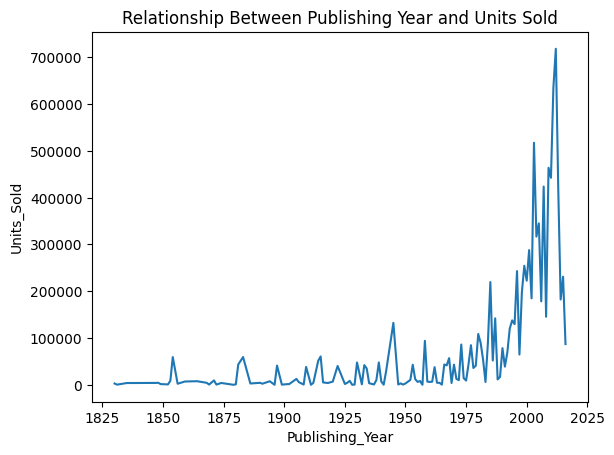

In [14]:
temp = data.groupby('Publishing_Year')['Units_Sold'].sum().to_frame().reset_index()
# Creating linechart
plt.plot(temp['Publishing_Year'], temp['Units_Sold'])
plt.title('Relationship Between Publishing Year and Units Sold')
plt.xlabel('Publishing_Year')
plt.ylabel('Units_Sold')
# Show the Chart Plot
plt.show()

The chart shows the relationship between the publishing year and units sold. It highlights a gradual increase in units sold until around the mid-20th century, followed by a sharp rise after 1940, peaking in the early 2000s. A slight decline is observed after the peak. This suggests a significant growth in book sales during recent decades.

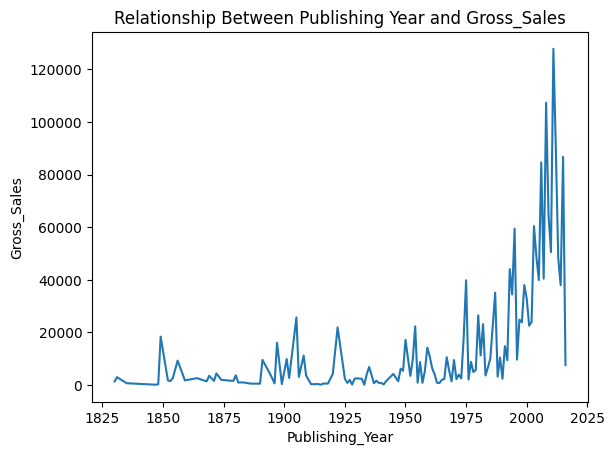

In [15]:
temp = data.groupby('Publishing_Year')['Gross_Sales'].sum().to_frame().reset_index()
# Creating linechart
plt.plot(temp['Publishing_Year'], temp['Gross_Sales'])
plt.title('Relationship Between Publishing Year and Gross_Sales')
plt.xlabel('Publishing_Year')
plt.ylabel('Gross_Sales')
# Show the Chart Plot
plt.show()

"The chart shows the relationship between the publishing year and gross sales. It highlights a gradual increase in gross sales until around the mid-20th century, followed by a sharp rise after 1940, peaking in the early 2000s. A slight decline in sales is observed after the peak. This suggests a significant growth in book sales during recent decades."

### Visualization and Analysis for Languages 

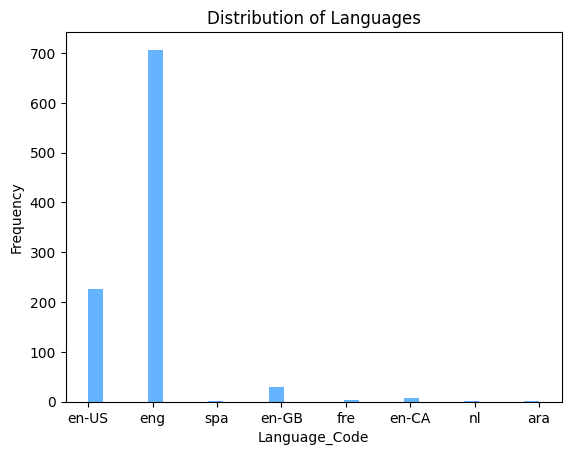

In [16]:
# Histogram
plt.hist(data['Language_Code'], color='#66b3ff',alpha=1, bins=30)
plt.title('Distribution of Languages')
plt.xlabel('Language_Code')
plt.ylabel('Frequency')
plt.show()

The chart shows the distribution of languages based on frequency. English (represented as "eng" and "en-US") dominates with the highest frequency, followed by a smaller contribution from other languages like "spa," "en-GB," and "fre." This indicates a strong prevalence of English content compared to other languages.

Text(0, 0.5, 'Gross_Sales')

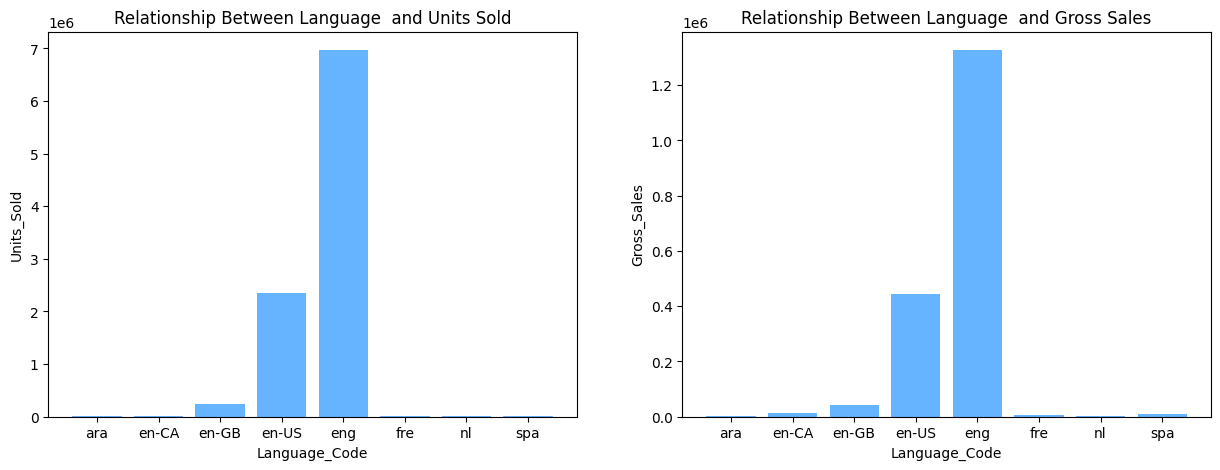

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Bar chart
temp = data.groupby('Language_Code')['Units_Sold'].sum().to_frame().reset_index()

axs[0].bar(temp['Language_Code'], temp['Units_Sold'], color='#66b3ff')
axs[0].set_title('Relationship Between Language  and Units Sold')
axs[0].set_xlabel('Language_Code')
axs[0].set_ylabel('Units_Sold')

# Bar chart for Genre vs. Gross Sales
temp = data.groupby('Language_Code')['Gross_Sales'].sum().to_frame().reset_index()

axs[1].bar(temp['Language_Code'], temp['Gross_Sales'], color='#66b3ff')
axs[1].set_title('Relationship Between Language  and Gross Sales')
axs[1].set_xlabel('Language_Code')
axs[1].set_ylabel('Gross_Sales')

The charts illustrate the relationship between language and sales metrics. English ("eng") leads significantly in both units sold and gross sales, followed by "en-US" with a much smaller share. Other languages, such as "fre," "nl," and "spa," contribute minimally. This highlights the dominance of English in driving both unit sales and revenue.

Text(0, 0.5, 'Units_Sold')

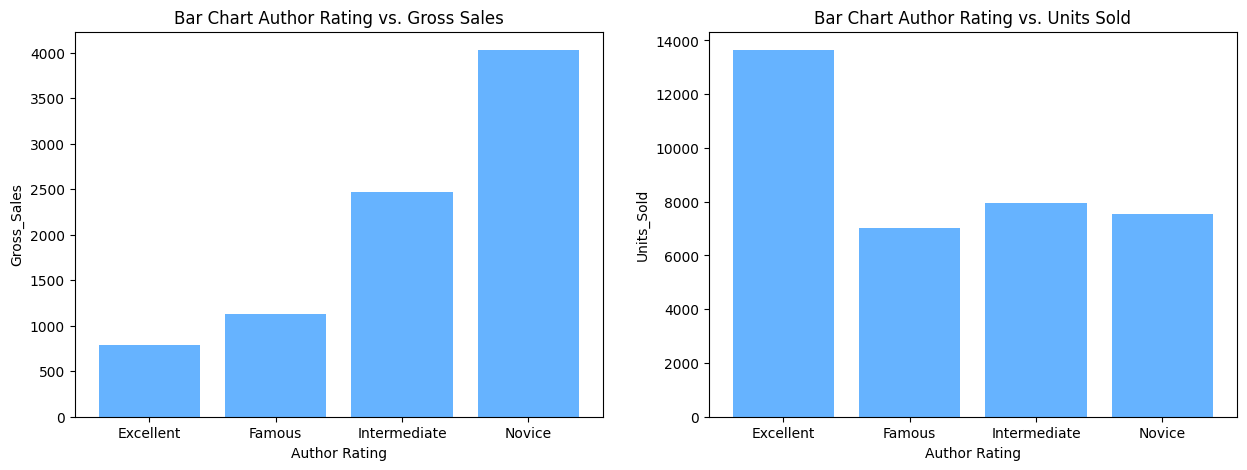

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

temp = data.groupby('Author_Rating')['Gross_Sales'].mean().to_frame().reset_index()

axs[0].bar(temp['Author_Rating'], temp['Gross_Sales'], color='#66b3ff')
axs[0].set_title('Bar Chart Author Rating vs. Gross Sales')
axs[0].set_xlabel('Author Rating')
axs[0].set_ylabel('Gross_Sales')

temp = data.groupby('Author_Rating')['Units_Sold'].mean().to_frame().reset_index()

axs[1].bar(temp['Author_Rating'], temp['Units_Sold'], color='#66b3ff')
axs[1].set_title('Bar Chart Author Rating vs. Units Sold')
axs[1].set_xlabel('Author Rating')
axs[1].set_ylabel('Units_Sold')

From the graph we can emphasize that if the author has high rating like Excellent he will have many Uints Sold but it doesn't mean that he will achive the highest Gross Sales

Text(0, 0.5, 'Book_Average_Rating')

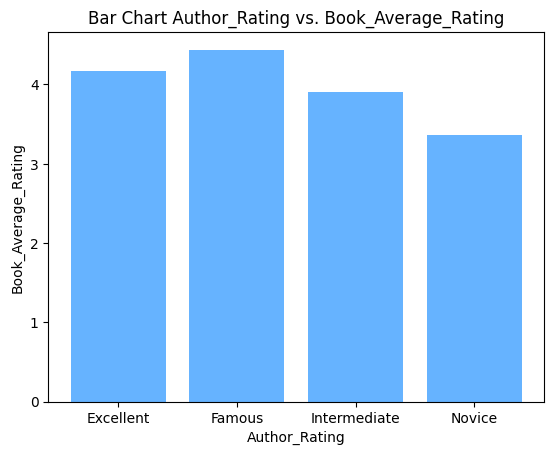

In [19]:
temp = data.groupby('Author_Rating')['Book_Average_Rating'].mean().to_frame().reset_index()

plt.bar(temp['Author_Rating'], temp['Book_Average_Rating'], color='#66b3ff')
plt.title('Bar Chart Author_Rating vs. Book_Average_Rating')
plt.xlabel('Author_Rating')
plt.ylabel('Book_Average_Rating')